In [1]:
# importing libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.image as pltimg
from sklearn import preprocessing
from sklearn import utils

In [2]:
cd /Users/Nandan Arora/OneDrive/Desktop/Introduction to artificial intelligence

C:\Users\Nandan Arora\OneDrive\Desktop\Introduction to artificial intelligence


In [3]:
#importing data
data = pd.read_csv("admission_data.csv", header = 0)

In [4]:
#reading data(going through the data)
print(data)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0          337          118                  4  4.5   4.5  9.65         1   
1          324          107                  4  4.0   4.5  8.87         1   
2          316          104                  3  3.0   3.5  8.00         1   
3          322          110                  3  3.5   2.5  8.67         1   
4          314          103                  2  2.0   3.0  8.21         0   
..         ...          ...                ...  ...   ...   ...       ...   
495        332          108                  5  4.5   4.0  9.02         1   
496        337          117                  5  5.0   5.0  9.87         1   
497        330          120                  5  4.5   5.0  9.56         1   
498        312          103                  4  4.0   5.0  8.43         0   
499        327          113                  4  4.5   4.5  9.04         0   

     Chance of Admit   
0                   1  
1                   0  
2  

In [5]:
#going through the data
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.310000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.462956
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


In [6]:
#checking for missing values 
total = data.isnull().sum().sort_values(ascending=False)
print(total)

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [7]:
# deleting the spaces in between the column names 
data.columns = data.columns.str.replace(' ', '')

In [8]:
print(data)

     GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research  \
0         337         118                 4  4.5  4.5  9.65         1   
1         324         107                 4  4.0  4.5  8.87         1   
2         316         104                 3  3.0  3.5  8.00         1   
3         322         110                 3  3.5  2.5  8.67         1   
4         314         103                 2  2.0  3.0  8.21         0   
..        ...         ...               ...  ...  ...   ...       ...   
495       332         108                 5  4.5  4.0  9.02         1   
496       337         117                 5  5.0  5.0  9.87         1   
497       330         120                 5  4.5  5.0  9.56         1   
498       312         103                 4  4.0  5.0  8.43         0   
499       327         113                 4  4.5  4.5  9.04         0   

     ChanceofAdmit  
0                1  
1                0  
2                0  
3                1  
4                0

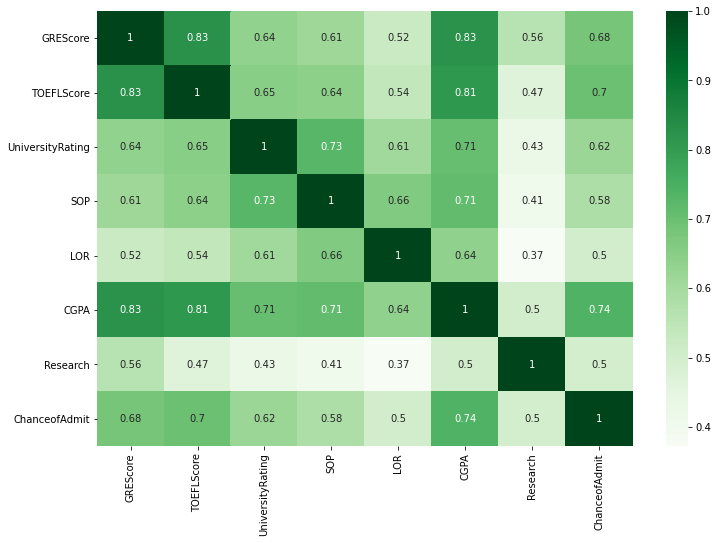

In [9]:
#correlation between the features 
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), cmap='Greens', annot= True)
plt.show()

In [10]:
#correlation of other features to chance of admit
data.corr()[['ChanceofAdmit']].sort_values(by = 'ChanceofAdmit', ascending= False)

,ChanceofAdmit
ChanceofAdmit,1.000000
CGPA,0.742278
TOEFLScore,0.699101
GREScore,0.683633
UniversityRating,0.618279
SOP,0.581077
LOR,0.500391
Research,0.498311


In [11]:
list(data.columns)

['GREScore',
 'TOEFLScore',
 'UniversityRating',
 'SOP',
 'LOR',
 'CGPA',
 'Research',
 'ChanceofAdmit']

In [12]:
#propotion of the chance of admit column 
data['ChanceofAdmit'].value_counts()

0    345
1    155
Name: ChanceofAdmit, dtype: int64

In [13]:
#splitting the target variable form the data
features = [
 'GREScore',
 'TOEFLScore',
 'UniversityRating',
 'SOP',
 'LOR',
 'CGPA',
 'Research']
X = data[features]
Y = data['ChanceofAdmit']

In [14]:
#printing the feature(X) and the target(Y)
print(X)
print(Y)

     GREScore  TOEFLScore  UniversityRating  SOP  LOR  CGPA  Research
0         337         118                 4  4.5  4.5  9.65         1
1         324         107                 4  4.0  4.5  8.87         1
2         316         104                 3  3.0  3.5  8.00         1
3         322         110                 3  3.5  2.5  8.67         1
4         314         103                 2  2.0  3.0  8.21         0
..        ...         ...               ...  ...  ...   ...       ...
495       332         108                 5  4.5  4.0  9.02         1
496       337         117                 5  5.0  5.0  9.87         1
497       330         120                 5  4.5  5.0  9.56         1
498       312         103                 4  4.0  5.0  8.43         0
499       327         113                 4  4.5  4.5  9.04         0

[500 rows x 7 columns]
0      1
1      0
2      0
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    1
Name: ChanceofAdmit, Length: 500, dty

In [15]:
#splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
#importing library 
from sklearn.tree import DecisionTreeClassifier

In [17]:
#fitting the decision tree model to the training sets
dtree = DecisionTreeClassifier(max_depth=2)
dtree = dtree.fit(X_train, Y_train)

In [21]:
#downloading library
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



In [29]:
#imporitng libraries 
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


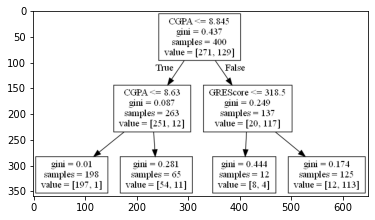

In [30]:
#plotting decision tree
data = tree.export_graphviz(dtree, out_file=None, feature_names = features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img = pltimg.imread('mydecisiontree.png')
imgplot= plt.imshow(img)
plt.show()

In [33]:
#printing decision tree algorithm in text
print(data)

digraph Tree {
node [shape=box] ;
0 [label="CGPA <= 8.845\ngini = 0.437\nsamples = 400\nvalue = [271, 129]"] ;
1 [label="CGPA <= 8.63\ngini = 0.087\nsamples = 263\nvalue = [251, 12]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.01\nsamples = 198\nvalue = [197, 1]"] ;
1 -> 2 ;
3 [label="gini = 0.281\nsamples = 65\nvalue = [54, 11]"] ;
1 -> 3 ;
4 [label="GREScore <= 318.5\ngini = 0.249\nsamples = 137\nvalue = [20, 117]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.444\nsamples = 12\nvalue = [8, 4]"] ;
4 -> 5 ;
6 [label="gini = 0.174\nsamples = 125\nvalue = [12, 113]"] ;
4 -> 6 ;
}


In [34]:
#printing the predicted Y
Y_pred = dtree.predict(X_test)
print(Y_pred)

[0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0]


In [40]:
# importing libraries 
# to test out model comclusion
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [41]:
#printing the confusion matrix  and the classification report
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[69  5]
 [ 1 25]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        74
           1       0.83      0.96      0.89        26

    accuracy                           0.94       100
   macro avg       0.91      0.95      0.93       100
weighted avg       0.95      0.94      0.94       100



In [2]:
#printing the accuracy of the model
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, Y_predict))

NameError: name 'metrics' is not defined

In [62]:
#importing libraries 
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from sklearn.pipeline import Pipeline

In [63]:
#Standardscaler to remove the outliers
std_slc = StandardScaler()
pca = decomposition.PCA()
dtree2 = tree.DecisionTreeClassifier()

In [64]:
# creating pineline to pass multiple parameters ro gridsearch
pipe = Pipeline(steps=[('std_slc', std_slc),
                      ('pca', pca),
                      ('dec_tree', dtree2)])

In [65]:
#PCA  reduces the dimensions of features
n_components = list(range(1,X.shape[1]+1,1))

In [76]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [77]:
parameters = dict(pca__n_components=  n_components,
                 dec_tree__criterion = criterion,
                 dec_tree__max_depth = max_depth)

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X,Y)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7]})

In [80]:
#  printing the best criterion to use
print('Best Criterion: ',clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth: ',clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best number of components: ',clf_GS.best_estimator_.get_params()['pca__n_components'])
print();print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion:  gini
Best max_depth:  2
Best number of components:  1

DecisionTreeClassifier(max_depth=2)
